## Introduction to VAE and Fashion MNIST

### Inspired by the book "Deep Learning" by François Chollet

**The Variational Autoencoder (VAE)** is a type of generative model used in machine learning and deep learning. It is particularly useful for tasks like data generation, image reconstruction, and feature learning. **The Fashion MNIST dataset** serves as a suitable candidate for applying VAE.

**Fashion MNIST** is a dataset comprising grayscale images of clothing and fashion items. It contains 60,000 training images and 10,000 test images across ten different classes, each representing a different fashion item such as shoes, dresses, or t-shirts. The dataset is widely used in machine learning for image classification tasks and, in this context, for VAE-based generative modeling.

**The Problem**: The problem addressed here is to leverage a Variational Autoencoder to learn a compact, continuous latent space representation of the Fashion MNIST images. VAEs are designed to capture the underlying structure in data and enable the generation of new, similar data samples from this learned latent space.

**import tensorflow as tf**: This imports the TensorFlow library, a popular open-source machine learning framework, and assigns it the alias tf.

**from tensorflow.keras.datasets import fashion_mnist**: This line imports the Fashion MNIST dataset from the TensorFlow Keras library. Fashion MNIST is a dataset of grayscale images of fashion items like clothing, shoes, and accessories.

**from tensorflow.keras.models import Model**: This line imports the Model class from TensorFlow Keras, which is used to define and train machine learning models.

**from tensorflow.keras import layers**: This imports various layers used to build neural networks, such as dense layers and convolutional layers, from the TensorFlow Keras library.

**from tensorflow import keras**: This imports the keras submodule from TensorFlow, which is a high-level neural networks API, making it easier to build and train models.

**import matplotlib.pyplot as plt**: This line imports the matplotlib library and assigns the alias plt. Matplotlib is used for data visualization and plotting, which can be handy for visualizing model performance and data.

**import numpy as np**: This line imports the NumPy library and assigns it the alias np. NumPy is used for numerical operations and working with arrays, which is fundamental in machine learning for data manipulation.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Add a channel dimension to represent grayscale images
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Define the latent space dimension
latent_dim = 200

4422102/4422102 [==============================] - 1s 0us/step


**_Let's break it down step by step:**


1. **Load the Fashion MNIST dataset**:
   - `(x_train, _), (x_test, _) = fashion_mnist.load_data()`: This code loads the Fashion MNIST dataset using a function from TensorFlow Keras. It assigns the training data to `x_train` and testing data to `x_test`. The use of `_` for the second tuple element is a convention to indicate that you're not interested in the corresponding labels at this point.

2. **Normalize Pixel Values**:
   - `x_train = x_train.astype('float32') / 255`: This line converts the pixel values in the `x_train` dataset to floating-point numbers and then scales them to the range [0, 1] by dividing each pixel value by 255. This is a common preprocessing step to ensure that data is within a suitable range for neural networks, which often work best with inputs in this range.
   - The same normalization is applied to the `x_test` dataset.

3. **Add a Channel Dimension for Grayscale Images**:
   - `x_train = x_train[..., tf.newaxis]`: This line adds a channel dimension to the `x_train` dataset to represent grayscale images properly. Grayscale images usually have a single channel, so this step ensures that the data has the shape (num_samples, height, width, channels) where `channels` is set to 1 for grayscale images.
   - The same dimension expansion is applied to the `x_test` dataset.

4. **Define the Latent Space Dimension**:
   - `latent_dim = 200`: This line defines the dimensionality of the latent space for a Variational Autoencoder (VAE). The VAE is a generative model that learns a compressed representation of data in this latent space. In this case, `latent_dim` is set to 200, meaning that the VAE will learn to represent data using 200 latent variables. The choice of the latent space dimension can significantly impact the generative and representational capabilities of the VAE.

After running this code, the Fashion MNIST dataset will be loaded, pixel values will be normalized, and the dataset will be formatted for use in a VAE with a latent space dimension of 200. This prepared dataset can then be used for training and evaluating a VAE model.

In [3]:
# VAE encoder network for fashion_mnist

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var], name='encoder')


**Now, let's dissect the functionality of each section within this code snippet**



1. **Define Input Layer**:
   - `encoder_inputs = keras.Input(shape=(28, 28, 1))`: This line creates an input layer for the encoder network. The specified shape `(28, 28, 1)` indicates that the input is expected to be a grayscale image with dimensions 28x28 pixels and one channel.

2. **Convolutional Layers**:
   - `x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(encoder_inputs)`: This line defines the first convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, a stride of 2, and "same" padding. This layer is used to extract low-level features from the input image.
   - `x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)`: This is the second convolutional layer with 64 filters and similar properties. It further extracts higher-level features by downscaling the data.

3. **Flatten Layer**:
   - `x = layers.Flatten()(x)`: This line flattens the output from the convolutional layers into a 1D vector. This step is necessary to transition from convolutional layers to fully connected layers in the neural network.

4. **Dense Layer**:
   - `x = layers.Dense(16, activation='relu')(x)`: This line defines a dense (fully connected) layer with 16 units and ReLU activation. This dense layer extracts higher-level features and represents a lower-dimensional representation of the input image.

5. **Define z_mean and z_log_var Layers**:
   - `z_mean = layers.Dense(latent_dim, name='z_mean')(x)`: This line defines a dense layer with `latent_dim` units (which, in this context, is not shown but should be defined elsewhere in your code) and names it 'z_mean'. This layer represents the mean of the latent space distribution.
   - `z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)`: Similarly, this line defines another dense layer with `latent_dim` units and names it 'z_log_var'. This layer represents the logarithm of the variance of the latent space distribution.

6. **Create the Encoder Model**:
   - `encoder = keras.Model(encoder_inputs, [z_mean, z_log_var], name='encoder')`: This line creates the encoder model by specifying the input layer (`encoder_inputs`) and the output layers (`[z_mean, z_log_var]`). The encoder's role is to map input images to the mean and log-variance of the distribution in the latent space.

In a Variational Autoencoder (VAE), the encoder is responsible for compressing input data into a latent space representation, and the decoder (not shown in this code) is responsible for reconstructing the data from the latent space. The encoder network enables the VAE to capture the underlying structure in the data and generate new, similar data samples.







In [4]:
# Sampler
class Sampler(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Sampler()([z_mean, z_log_var])


This code defines a custom layer named `Sampler` and demonstrates its usage. The `Sampler` layer plays a crucial role in the Variational Autoencoder (VAE) by sampling random points in the latent space based on the mean and log-variance of the latent space distribution. Here's an explanation of this code:

1. **Sampler Class Definition**:
   - `class Sampler(layers.Layer):`: This line defines a custom layer named `Sampler` that inherits from the `layers.Layer` class. This custom layer will be responsible for sampling points in the latent space.

2. **`call` Method**:
   - `def call(self, inputs):`: This defines the `call` method for the `Sampler` layer. The `call` method is what gets executed when you pass data through the layer. It takes `inputs` as its argument.

3. **Input Retrieval**:
   - `z_mean, z_log_var = inputs`: This line unpacks the inputs into `z_mean` and `z_log_var`. In this context, `z_mean` represents the mean of the latent space distribution, and `z_log_var` represents the logarithm of the variance of the latent space distribution.

4. **Sampling Randomness**:
   - `epsilon = tf.random.normal(shape=tf.shape(z_mean))`: Here, a random vector `epsilon` is generated from a normal distribution. The shape of `epsilon` matches the shape of `z_mean`, ensuring it has the same dimensions.

5. **Sample Generation**:
   - `return z_mean + tf.exp(0.5 * z_log_var) * epsilon`: This line generates the sampled point in the latent space. It takes into account the mean (`z_mean`), the log-variance (`z_log_var`), and the random noise vector (`epsilon`). The formula `z_mean + tf.exp(0.5 * z_log_var) * epsilon` is derived from the reparameterization trick, which allows you to sample from the latent space distribution in a differentiable manner, making it suitable for training with backpropagation.

6. **Sampling in Practice**:
   - `z = Sampler()([z_mean, z_log_var])`: This line creates an instance of the `Sampler` layer and immediately applies it to the mean (`z_mean`) and log-variance (`z_log_var`) values from the encoder. The resulting `z` represents a sampled point in the latent space.

In a VAE, this sampling step is essential for generating new data points. It allows you to explore the latent space by generating different points within the learned distribution, which can then be decoded into new data samples, effectively enabling data generation and interpolation.

In [5]:
# VAE decoder network
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation='relu')(latent_inputs)  # Adapt to the desired dimensions
x = layers.Reshape((7, 7, 64))(x)  # Adapt to the desired dimensions
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)  # 1 channel for Fashion MNIST
decoder = keras.Model(latent_inputs, decoder_outputs, name='decoder')


Let's break down what each part of this code is doing:

1. **Define Input Layer**:
   - `latent_inputs = keras.Input(shape=(latent_dim,))`: This line creates an input layer for the decoder network. It specifies that the input will be a vector with a dimension of `latent_dim`. The `latent_dim` was defined previously as 128, so this input represents a point in the latent space.

2. **Dense Layer**:
   - `x = layers.Dense(7 * 7 * 64, activation='relu')(latent_inputs)`: This line defines a dense (fully connected) layer with 7*7*64 units and ReLU activation. The purpose of this layer is to map the point from the latent space to a higher-dimensional representation that can be reshaped into a 3D tensor.

3. **Reshape Layer**:
   - `x = layers.Reshape((7, 7, 64))(x)`: This line reshapes the output from the previous dense layer into a 3D tensor with dimensions (7, 7, 64). This is a common step in decoder networks to prepare the data for transposed convolutional layers.

4. **Transposed Convolutional Layers**:
   - `x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)`: This line defines the first transposed convolutional layer. It has 64 filters, a 3x3 kernel, ReLU activation, a stride of 2, and "same" padding. Transposed convolutional layers, also known as deconvolutional layers, upsample the data.
   - `x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)`: This is the second transposed convolutional layer with 32 filters, similar kernel and activation, and further upsampling.
   - `decoder_outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)`: The final transposed convolutional layer has 1 filter, a 3x3 kernel, sigmoid activation, and "same" padding. It generates the output image with a single channel, suitable for Fashion MNIST images (which are grayscale).

5. **Create the Decoder Model**:
   - `decoder = keras.Model(latent_inputs, decoder_outputs, name='decoder')`: This line creates the decoder model by specifying the input layer (`latent_inputs`) and the output layer (`decoder_outputs`). The decoder's role is to map points in the latent space back to reconstructed images.


In [6]:
# VAE model
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.sampler = Sampler()
        self.total_loss_tracker = keras.metrics.Mean(name='total_loss')
        self.reconstruction_loss_tracker = keras.metrics.Mean(name='reconstruction_loss')
        self.kl_loss_tracker = keras.metrics.Mean(name='kl_loss')

    @property
    def metrics(self):
        return [self.total_loss_tracker, self.reconstruction_loss_tracker, self.kl_loss_tracker]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var = self.encoder(data)
            z = self.sampler([z_mean, z_log_var])
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.mean_squared_error(data, reconstruction)
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            total_loss = reconstruction_loss + tf.reduce_mean(kl_loss)
        
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            'total_loss': self.total_loss_tracker.result(),
            'reconstruction_loss': self.reconstruction_loss_tracker.result(),
            'kl_loss': self.kl_loss_tracker.result(),
        }

# Create and train the VAE
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(x_train, epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 13s 7ms/step - total_loss: 0.0931 - reconstruction_loss: 0.0931 - kl_loss: 6.6056e-05
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - total_loss: 0.0882 - reconstruction_loss: 0.0882 - kl_loss: 2.8965e-06
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - total_loss: 0.0879 - reconstruction_loss: 0.0879 - kl_loss: 2.0472e-06
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - total_loss: 0.0877 - reconstruction_loss: 0.0877 - kl_loss: 1.6046e-06
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - total_loss: 0.0876 - reconstruction_loss: 0.0876 - kl_loss: 1.4687e-06
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - total_loss: 0.0875 - reconstruction_loss: 0.0875 - kl_loss: 1.2523e-06
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - total_loss: 0.0875 - reconstruction_loss: 0.0875 - kl_loss: 1.1664e-06
Epoch 8/100
469/469

**We'll go through the code piece by piece to understand it**

1. `class VAE(keras.Model)`: This defines a custom VAE class that inherits from the Keras `Model` class. This class is designed to encapsulate the entire VAE model.

2. `__init__(self, encoder, decoder, **kwargs)`: This is the constructor method for the VAE class. It takes two arguments, `encoder` and `decoder`, which are instances of encoder and decoder models (presumably defined elsewhere in the code). It also accepts any additional keyword arguments `**kwargs`. Inside the constructor:
   - `super().__init__(**kwargs)` calls the constructor of the parent class (Keras Model) and initializes it.
   - `self.encoder = encoder` and `self.decoder = decoder` store the encoder and decoder models as attributes of the VAE instance.
   - `self.sampler = Sampler()` creates an instance of a `Sampler` class, which is assumed to be defined elsewhere in the code.
   - Three metric trackers (`total_loss_tracker`, `reconstruction_loss_tracker`, and `kl_loss_tracker`) are created to keep track of different metrics during training.

3. `@property def metrics(self)`: This is a property method that defines which metrics should be tracked for this model. It returns a list of the three metric trackers defined earlier.

4. `train_step(self, data)`: This method defines a single training step for the VAE. It takes a batch of input data (`data`) as its argument. Inside the method:
   - It uses a TensorFlow `GradientTape` to compute gradients for the loss function with respect to the model's trainable weights.
   - The encoder is used to obtain the mean (`z_mean`) and log variance (`z_log_var`) of the latent space from the input data.
   - A sampling step is performed using a `Sampler` to obtain the latent variable `z`.
   - The decoder is used to reconstruct the input data from the sampled `z`.
   - Reconstruction loss is calculated using mean squared error between the input data and the reconstructed data.
   - The Kullback-Leibler (KL) divergence loss is calculated.
   - The total loss is computed as the sum of the reconstruction loss and the KL loss.
   - Gradients are computed with respect to the total loss and then applied to update the model's trainable weights using the optimizer.
   - Metric trackers are updated with the values of `total_loss`, `reconstruction_loss`, and `kl_loss`.
   - The method returns a dictionary containing these three loss components.

5. `vae = VAE(encoder, decoder)`: This creates an instance of the VAE model by passing the encoder and decoder models as arguments.

6. `vae.compile(optimizer=keras.optimizers.Adam())`: This compiles the VAE model with the Adam optimizer. It prepares the model for training.

7. `vae.fit(x_train, epochs=100, batch_size=128)`: This trains the VAE model on the dataset `x_train` for 100 epochs with a batch size of 128. It uses the training data to update the model's weights and minimize the defined loss functions.

The code as a whole defines a Variational Autoencoder (VAE), a type of neural network architecture used for generative modeling. VAEs are commonly used for tasks like image generation and data compression by mapping data to a lower-dimensional latent space and then reconstructing it.

1/1 [==============================] - 0s 17ms/step


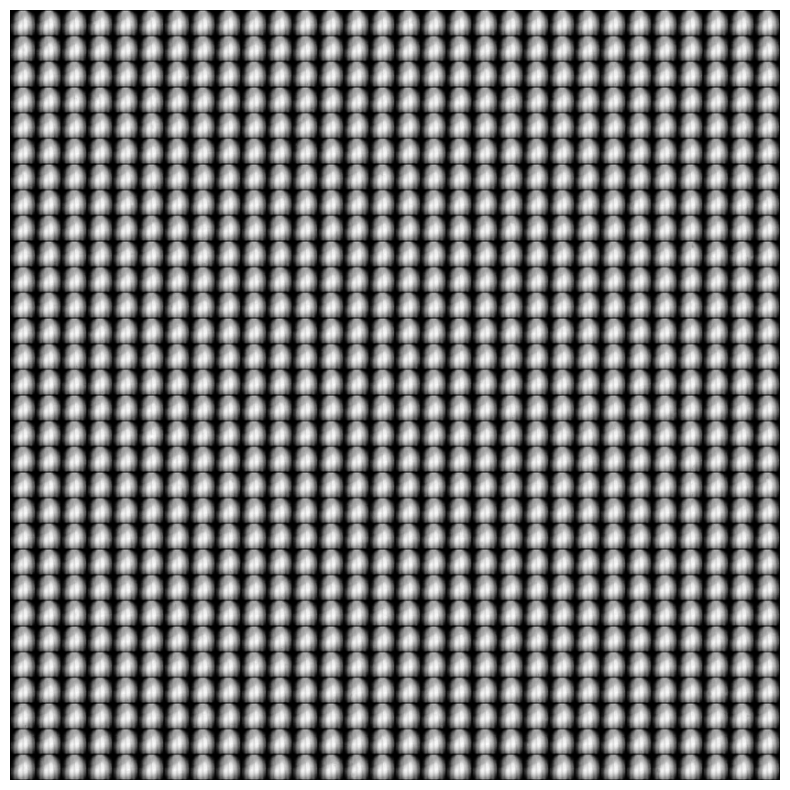

In [7]:
# Define the parameters for image generation
n = 30
digit_size = 28  # Adjust the digit size to match the size of your grayscale images
figure = np.zeros((digit_size * n, digit_size * n), dtype=np.uint8)

grid_x = np.linspace(-2, 2, n)
grid_y = np.linspace(-2, 2, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        # Sample from the latent space (2 dimensions in this case)
        z_sample = np.random.normal(size=(1, latent_dim))
        x_decoded = vae.decoder.predict(z_sample)  # Generate an image from the latent vector
        digit = (x_decoded[0] * 255).astype(np.uint8)[:, :, 0]  # Convert to 2D and rescale to 8-bit grayscale
        figure[
            i * digit_size : (i + 1) * digit_size,
            j * digit_size : (j + 1) * digit_size,
        ] = digit

# Create a plot to display the generated grayscale images
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='gray')
plt.axis("off")
plt.show()


**Finally, we'll break apart the code to comprehend its structure**

1. **Define Parameters**: 
   - `n` is set to 30, which represents the number of images in each row and column of the grid.
   - `digit_size` is set to 28, which is the size of each grayscale image. You should adjust this to match the size of the grayscale images you are working with.
   - `figure` is initialized as a NumPy array of zeros with dimensions `(digit_size * n, digit_size * n)`. This array will hold the generated images.

2. **Grid Creation**:
   - `grid_x` and `grid_y` are created using NumPy's `linspace` function. These arrays represent the coordinates in the latent space that will be used for sampling.

3. **Sampling and Image Generation**:
   - The code then enters a nested loop that iterates over the `grid_x` and `grid_y` coordinates.
   - For each combination of `xi` and `yi`, it samples from the latent space using `np.random.normal`. The `latent_dim` is assumed to be defined elsewhere in your code, and it represents the dimensionality of the latent space (usually 2 for a 2D latent space).
   - It then passes the sampled latent vector `z_sample` to the VAE's decoder model (`vae.decoder.predict(z_sample)`) to generate an image. The decoder maps the latent vector back to an image in this step.
   - The generated image is then scaled and converted to an 8-bit grayscale image by multiplying by 255 and taking only the first channel (assuming it's a grayscale image).

4. **Populating the `figure` Array**:
   - The generated grayscale image is placed in the `figure` array at the appropriate position within the grid.

5. **Display the Generated Images**:
   - A plot is created using Matplotlib with a size of 10x10 inches.
   - The `figure` array is displayed as an image using `plt.imshow`. The colormap is set to grayscale using `cmap='gray'`.
   - `plt.axis("off")` is used to hide the axis.
   - Finally, `plt.show()` is called to display the grid of generated grayscale images.

